<a href="https://colab.research.google.com/github/Gopi-13-svg/PYTHO/blob/main/Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn .metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [ ]:
#load_data
data=pd.read_csv(r"C:\Users\Gopi\Downloads\Heart_Disease_Dataset.csv")

In [ ]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
100196,No,48.02,No,No,Yes,13,17,No,Female,45-49,White,"No, borderline diabetes",No,Fair,6.4,Yes,No,No
100197,Yes,82.88,No,No,No,29,23,No,Male,75-79,Other,"No, borderline diabetes",Yes,Very good,18.9,Yes,Yes,No
100198,No,39.46,No,Yes,Yes,23,6,Yes,Male,80 or older,Hispanic,Yes,No,Excellent,18.5,Yes,No,Yes
100199,No,46.25,Yes,Yes,Yes,9,14,No,Male,25-29,American Indian/Alaskan Native,No,No,Very good,22.7,Yes,Yes,No
100200,No,39.26,Yes,No,No,10,5,Yes,Female,25-29,Other,"No, borderline diabetes",Yes,Fair,4.1,No,No,Yes


In [ ]:
# information about coloumns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100201 entries, 0 to 100200
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      100201 non-null  object 
 1   BMI               100201 non-null  float64
 2   Smoking           100201 non-null  object 
 3   AlcoholDrinking   100201 non-null  object 
 4   Stroke            100201 non-null  object 
 5   PhysicalHealth    100201 non-null  int64  
 6   MentalHealth      100201 non-null  int64  
 7   DiffWalking       100201 non-null  object 
 8   Sex               100201 non-null  object 
 9   AgeCategory       100201 non-null  object 
 10  Race              100201 non-null  object 
 11  Diabetic          100201 non-null  object 
 12  PhysicalActivity  100201 non-null  object 
 13  GenHealth         100201 non-null  object 
 14  SleepTime         100201 non-null  float64
 15  Asthma            100201 non-null  object 
 16  KidneyDisease     10

In [ ]:
data.shape


(100201, 18)

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,100201.000000,100201.000000,100201.000000,100201.000000
mean,53.373302,14.503937,14.498239,12.490389
std,23.878712,8.640423,8.658639,6.632122
min,12.020000,0.000000,0.000000,1.000000
25%,32.760000,7.000000,7.000000,6.700000
50%,53.380000,14.000000,15.000000,12.500000
75%,73.950000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [ ]:
#checking null values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
#DUPLICATE
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
100196    False
100197    False
100198    False
100199    False
100200    False
Length: 100201, dtype: bool

In [ ]:
len(data[data.duplicated()])

0

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
for column in data.columns:
    print(data[column].value_counts())

HeartDisease
Yes    50134
No     50067
Name: count, dtype: int64
BMI
56.38    26
91.47    26
27.95    26
88.49    26
66.39    25
         ..
23.75     3
29.15     3
65.14     3
34.33     2
91.36     2
Name: count, Length: 8284, dtype: int64
Smoking
Yes    50445
No     49756
Name: count, dtype: int64
AlcoholDrinking
Yes    50435
No     49766
Name: count, dtype: int64
Stroke
Yes    50265
No     49936
Name: count, dtype: int64
PhysicalHealth
8     3430
20    3401
9     3395
16    3392
19    3386
13    3385
12    3377
26    3369
29    3363
15    3355
23    3354
22    3347
28    3345
14    3343
2     3341
1     3337
10    3334
11    3332
6     3329
0     3328
17    3327
7     3323
24    3316
5     3305
18    3301
3     3287
21    3285
27    3277
25    3270
4     3267
Name: count, dtype: int64
MentalHealth
27    3442
16    3442
13    3419
5     3403
26    3397
21    3394
22    3390
7     3382
2     3377
8     3376
1     3374
18    3367
14    3362
28    3361
6     3360
3     3357
20    3342
9

In [ ]:
#one hot encoding
data=pd.get_dummies(data,columns=['Diabetic'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [ ]:
#convert binary categorical variables into numerical
binary_columns=["Smoking","AlcoholDrinking","Stroke","DiffWalking",'PhysicalActivity',"Asthma",'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col]=data[col].map({'Yes':1,"No":0})

In [ ]:
data=pd.get_dummies(data,columns=['Sex',"AgeCategory","Race","GenHealth"],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,1,1,0,7,6,1,1,17.1,...,False,False,False,False,False,True,True,False,False,False
1,Yes,36.93,1,1,0,3,10,0,1,2.7,...,False,False,False,True,False,False,False,False,True,False
2,No,18.70,1,0,1,26,15,0,0,15.6,...,False,False,False,True,False,False,False,False,True,False
3,Yes,31.43,1,1,1,24,20,0,0,1.4,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,0,0,1,2,29,0,1,8.8,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
##null values
data.isnull().sum()

HeartDisease                        0
BMI                                 0
Smoking                             0
AlcoholDrinking                     0
Stroke                              0
PhysicalHealth                      0
MentalHealth                        0
DiffWalking                         0
PhysicalActivity                    0
SleepTime                           0
Asthma                              0
KidneyDisease                       0
SkinCancer                          0
Diabetic_No, borderline diabetes    0
Diabetic_Yes                        0
Diabetic_Yes (during pregnancy)     0
Sex_Male                            0
AgeCategory_25-29                   0
AgeCategory_30-34                   0
AgeCategory_35-39                   0
AgeCategory_40-44                   0
AgeCategory_45-49                   0
AgeCategory_50-54                   0
AgeCategory_55-59                   0
AgeCategory_60-64                   0
AgeCategory_65-69                   0
AgeCategory_

In [ ]:
## define X input and target
X=data.drop(columns=['HeartDisease'])
y=data['HeartDisease'].map({"Yes":1,"No":0})

In [ ]:
##train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
clf=DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
y_pred=clf.predict(X_test)## make the prediction

Accuracy: 0.50
Precision: 0.50
Recall: 0.51
F1-Score: 0.50
AUC-ROC: 0.50


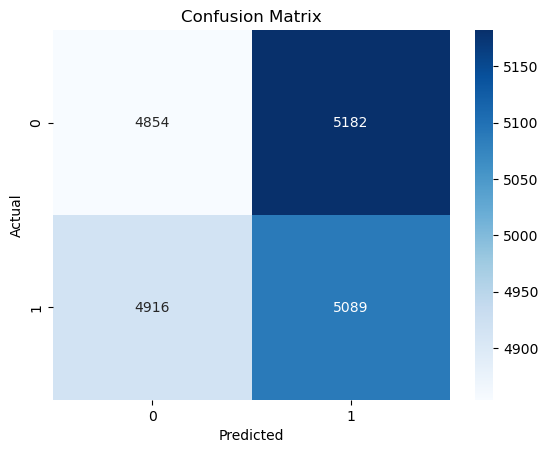

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00


In [2]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv(r"/content/Heart_Disease_Dataset.csv")  # Replace with your actual dataset path

# Preprocessing steps
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth', 'Diabetic'], drop_first=True)

# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_heart_disease(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Streamlit app
st.title("Heart Disease Prediction")

# Input fields
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)
smoking = st.selectbox("Smoking", [0, 1])
alcohol_drinking = st.selectbox("Alcohol Drinking", [0, 1])
stroke = st.selectbox("Stroke", [0, 1])
physical_health = st.number_input("Physical Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking", [0, 1])
sex = st.selectbox("Sex", ["Female", "Male"])
age_category = st.selectbox("Age Category", ["25-29", "30-34", "35-39", "40-44", "50-54", "70-74"])
race = st.selectbox("Race", ["White", "Hispanic", "Black", "Asian", "American Indian/Alaskan Native"])
diabetic = st.selectbox("Diabetic Status", ["No", "No, borderline diabetes", "Yes (during pregnancy)", "Yes"])
physical_activity = st.selectbox("Physical Activity", [0, 1])
gen_health = st.selectbox("General Health", ["Poor", "Fair", "Good", "Very Good", "Excellent"])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=0, max_value=24, value=7)
asthma = st.selectbox("Asthma", [0, 1])
kidney_disease = st.selectbox("Kidney Disease", [0, 1])
skin_cancer = st.selectbox("Skin Cancer", [0, 1])

# Prepare input data
input_data = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex_Male': 1 if sex == "Male" else 0,
    'AgeCategory_30-34': 1 if age_category == "30-34" else 0,
    'AgeCategory_35-39': 1 if age_category == "35-39" else 0,
    'AgeCategory_40-44': 1 if age_category == "40-44" else 0,
    'AgeCategory_50-54': 1 if age_category == "50-54" else 0,
    'AgeCategory_70-74': 1 if age_category == "70-74" else 0,
    'Race_Hispanic': 1 if race == "Hispanic" else 0,
    'Race_Black': 1 if race == "Black" else 0,
    'Race_Asian': 1 if race == "Asian" else 0,
    'Race_American Indian/Alaskan Native': 1 if race == "American Indian/Alaskan Native" else 0,
    'Diabetic_No, borderline diabetes': 1 if diabetic == "No, borderline diabetes" else 0,
    'Diabetic_Yes (during pregnancy)': 1 if diabetic == "Yes (during pregnancy)" else 0,
    'Diabetic_Yes': 1 if diabetic == "Yes" else 0,
    'PhysicalActivity': physical_activity,
    'GenHealth_Fair': 1 if gen_health == "Fair" else 0,
    'GenHealth_Good': 1 if gen_health == "Good" else 0,
    'GenHealth_Very Good': 1 if gen_health == "Very Good" else 0,
    'GenHealth_Excellent': 1 if gen_health == "Excellent" else 0,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# Predict button
if st.button("Predict"):
    result = predict_heart_disease(input_data)
    st.write(f"Heart Disease Prediction: {result}")

Writing app.py


In [3]:
! wget -q -O - ipv4.icanhazip.com  ##for getting the code

34.138.158.182


In [ ]:
## run streamlit
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.158.182:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://chatty-eyes-fail.loca.lt
